# Exercises for the Scientific Computing Course at ULL (Physics Degree)
**Jacobo Álvarez Gutiérrez**

# Exercise 1
The plane curve called **trochoid**, a generalization of the **cycloid**, is the curve described by a point \(P\) located at a distance \(b\) from the center of a circle of radius \(a\), as it rolls (without sliding) on a horizontal suface. Its coordinates \(x,y\) are as follows:
$$
x = a \theta - b \sin \theta, \quad y = a - b \cos \theta
$$
Write a program to plot three curves (continuous and without markers) on the same Cartesian graph \(OX, OY\), for an interval $\theta$ = [0.0, 18.0] (in radians) and for the following values:
- \(a = 5.0\) and \(b = 2.0\)
- \(a = 5.0\) and \(b = 5.0\)
- \(a = 5.0\) and \(b = 8.0\)

Label the axes appropriately and include a legend with the three \(b\) values that distinguish the curves.the curves.


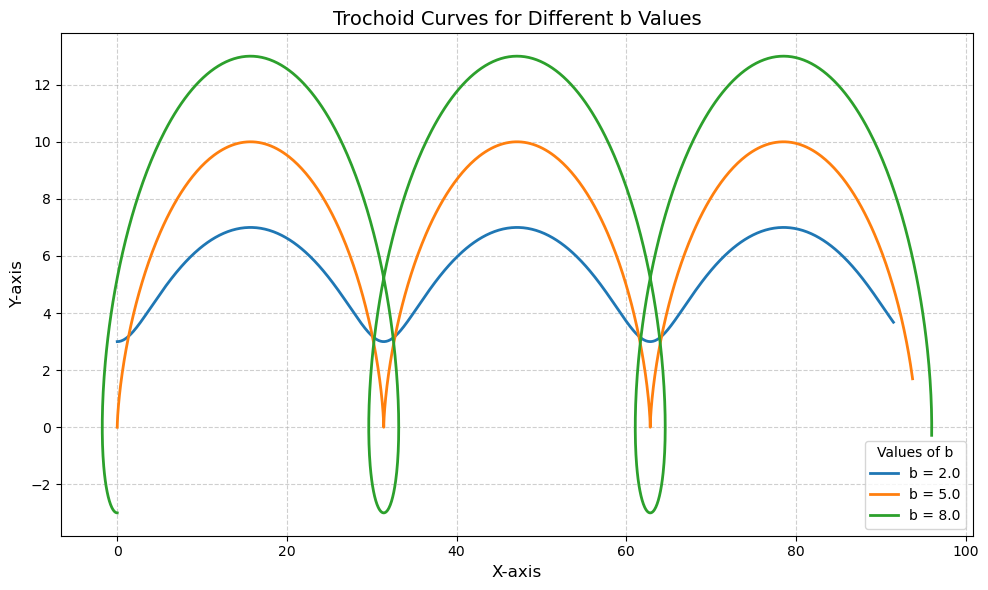

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define trochoid function
def trochoid(a, b, theta):
    x = a * theta - b * np.sin(theta)
    y = a - b * np.cos(theta)
    return x, y

# Theta interval
theta = np.linspace(0.0, 18.0, 1000)  # 1000 points for soft

# Parameters
a = 5.0
b_values = [2.0, 5.0, 8.0]  # Valores de b

# Create the graph
plt.figure(figsize=(10, 6))
for b in b_values:
    x, y = trochoid(a, b, theta)
    plt.plot(x, y, label=f"b = {b}", linewidth=2)

# Graph settings
plt.title("Trochoid Curves for Different b Values", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Values of b", fontsize=10)
plt.tight_layout()

# Show the graph
plt.show()

# Exercise 2
Draw the different trajectories of projectiles fired by a cannon located on flat ground for various elevation angles (inclination relativo to the horizontal) over a time interval from 0 to 60 seconds. The cannon provides an initial velocity of 300 m/s. Plot the trajectories for the following elevation angles: 20, 30, 40, 50, 60 and 70 degrees, assuming the cannon is positioned at the origin of the coordinate system. Label the axes appropriately and include a legend to identify the different trajectories. Remember that the projectile cannot penetrate the ground, so apropriate boundaries must be set for the plot.

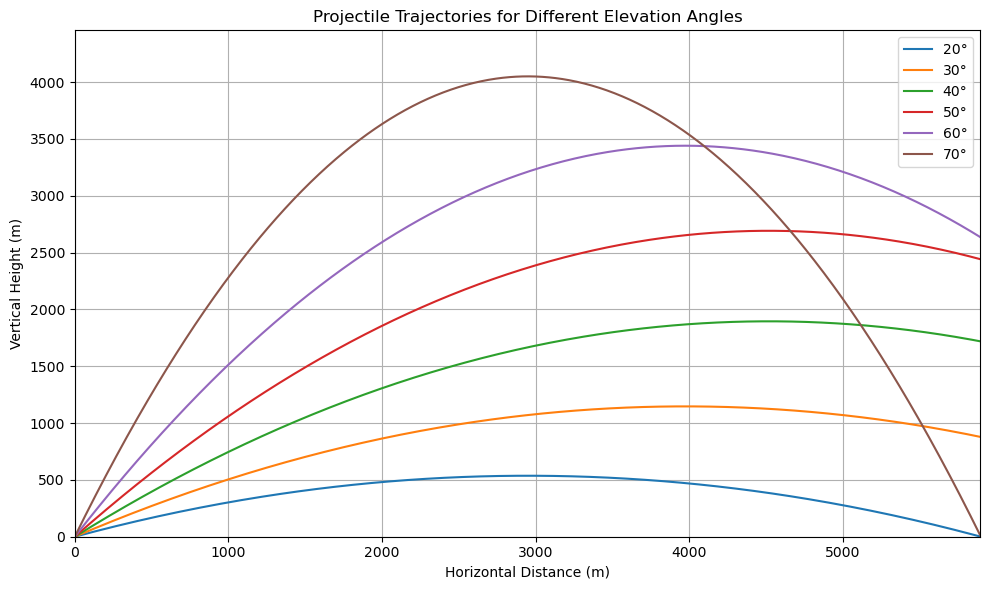

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
initial_velocity = 300  # m/s
gravity = 9.81  # m/s^2
time_interval = np.linspace(0, 60, 1000)  # Time from 0 to 60 seconds
angles = [20, 30, 40, 50, 60, 70]  # Elevation angles in degrees

# Create the plot
plt.figure(figsize=(10, 6))

for angle in angles:
    # Convert angle to radians
    theta = np.radians(angle)
    
    # Calculate x and y coordinates
    x = initial_velocity * np.cos(theta) * time_interval
    y = initial_velocity * np.sin(theta) * time_interval - 0.5 * gravity * time_interval**2
    
    # Remove points where the projectile is below ground level
    x = x[y >= 0]
    y = y[y >= 0]
    
    # Plot the trajectory
    plt.plot(x, y, label=f"{angle}°")

# Add labels, legend, and title
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.title("Projectile Trajectories for Different Elevation Angles")
plt.legend()
plt.grid(True)

# Set limits for better visualization
plt.xlim(0, max(x))
plt.ylim(0, max(y) * 1.1)

# Show the plot
plt.tight_layout()
plt.show()

# Exercise 3
When a coherent light source passes through a thin slit, diffraction occurs, producing an intensity pattern described by the Fraunhofer approximation:
$$
I(\theta) = I_{0}\left(\frac{\sin(\beta)}{\beta}\right)^{2},\quad \beta = \frac{\pi a \sin(\theta)}{\lambda}
$$
where a is the slit width, $\lambda$ is the wavelength of the light, $I_{0}$ is the intensity along the central axis, and $\theta$ is the angle of the position measured relative to the slit axis (see diagram).

<div style="text-align: center;">
    <img src="exercise_3.png" alt="Diagram Exercise 3" width="500">
</div>

Graphically represent the intensity of the diffraction pattern for $\lambda$ = 400 nm, $\lambda$ = 650 nm, and $\lambda$ = 800 nm, using $I_{0}$ = 1 and a = 0.04 mm, over the interval -$\pi$/20 < $\theta$ < +$\pi$/20.
Verify the effect of the diffraction pattern when the slit width is doubled.

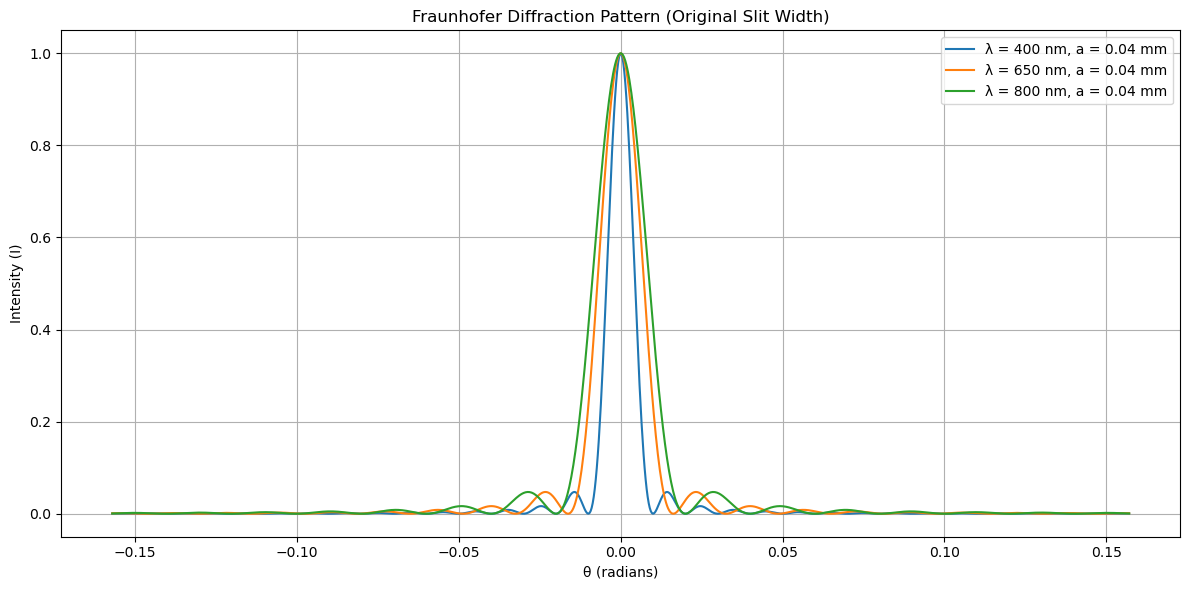

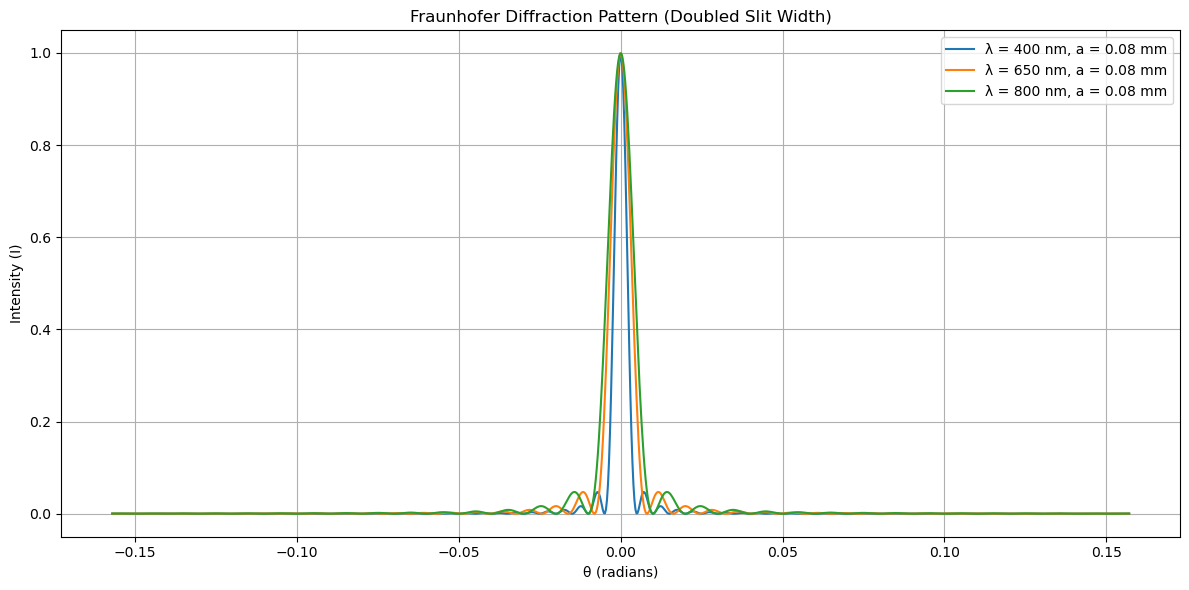

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
I0 = 1  # Intensity along the central axis
a = 0.04e-3  # Slit width in meters (0.04 mm)
wavelengths = [400e-9, 650e-9, 800e-9]  # Wavelengths in meters (400 nm, 650 nm, 800 nm)
theta = np.linspace(-np.pi / 20, np.pi / 20, 1000)  # Angular range (radians)

# Function to calculate the intensity pattern
def diffraction_intensity(theta, wavelength, slit_width):
    beta = (np.pi * slit_width * np.sin(theta)) / wavelength
    # Handle division by zero for beta = 0
    intensity = np.zeros_like(beta)
    intensity[beta != 0] = (np.sin(beta[beta != 0]) / beta[beta != 0]) ** 2
    intensity[beta == 0] = 1  # At the central maximum
    return I0 * intensity

# Plot for original slit width
plt.figure(figsize=(12, 6))
for wavelength in wavelengths:
    intensity = diffraction_intensity(theta, wavelength, a)
    plt.plot(theta, intensity, label=f"λ = {wavelength*1e9:.0f} nm, a = {a*1e3:.2f} mm")

plt.xlabel("θ (radians)")
plt.ylabel("Intensity (I)")
plt.title("Fraunhofer Diffraction Pattern (Original Slit Width)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for doubled slit width
plt.figure(figsize=(12, 6))
for wavelength in wavelengths:
    intensity = diffraction_intensity(theta, wavelength, 2 * a)
    plt.plot(theta, intensity, label=f"λ = {wavelength*1e9:.0f} nm, a = {2*a*1e3:.2f} mm")

plt.xlabel("θ (radians)")
plt.ylabel("Intensity (I)")
plt.title("Fraunhofer Diffraction Pattern (Doubled Slit Width)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Exercise 4
The temperature variation of an object at temperature $T_{0}$ in an environment at $T_{s}$ changes as follows:
$$
T = T_{s} + \left(T_{0} - T_{s}\right)e^{-kt}
$$
where t is in hours, and k is a parameter that depends on the object.

a) Graph the temperature variation over time, starting from $T_{0}$ = 5$^{\circ}$ C over a period of 24 hours, assuming k = 0.45 and an ambient temperature of 40 $^{\circ}$ C.

b) Superimpose on this curve the corresponding curves for other objects with k=0.3 and k=0.6 using other colors and markdowns and identify each one in the legend.

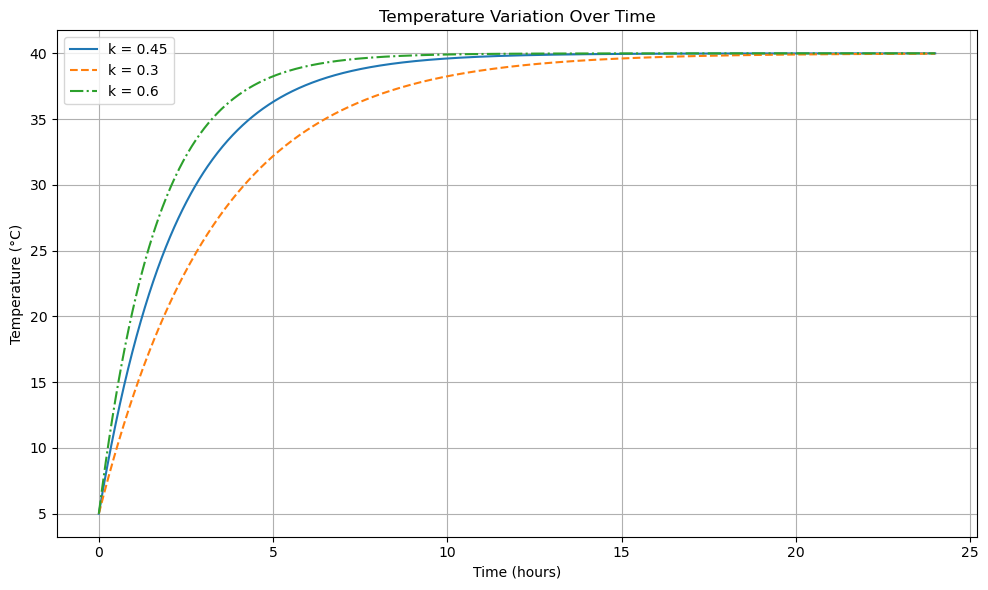

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T_s = 40  # Ambient temperature in °C
T_0 = 5   # Initial object temperature in °C
t = np.linspace(0, 24, 1000)  # Time in hours (0 to 24)

# Function for temperature variation
def temperature(T_s, T_0, k, t):
    return T_s + (T_0 - T_s) * np.exp(-k * t)

# Parameters for the objects
k_values = [0.45, 0.3, 0.6]  # Decay constants for different objects
styles = ['-', '--', '-.']  # Line styles for different curves
labels = [f'k = {k}' for k in k_values]

# Plot
plt.figure(figsize=(10, 6))
for k, style, label in zip(k_values, styles, labels):
    T = temperature(T_s, T_0, k, t)
    plt.plot(t, T, style, label=label)

# Labels, legend, and title
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Exercise 5
Using the Gregory-Leibniz series for calculatin $\pi$
$$
\pi = 4\sum_{k=1}^{n}\frac{(-1)^{k+1}}{2k-1}
$$
the value of $\pi$ converges slowly to the true value as more terms are added.

Calculate all the values $\pi$ takes with each added term and plot the first 300 values in a figure with two subplots (using subplot()). One subplot should show the values of $\pi$ versus the number of terms used, and the other should show the absolute error of $\pi$.

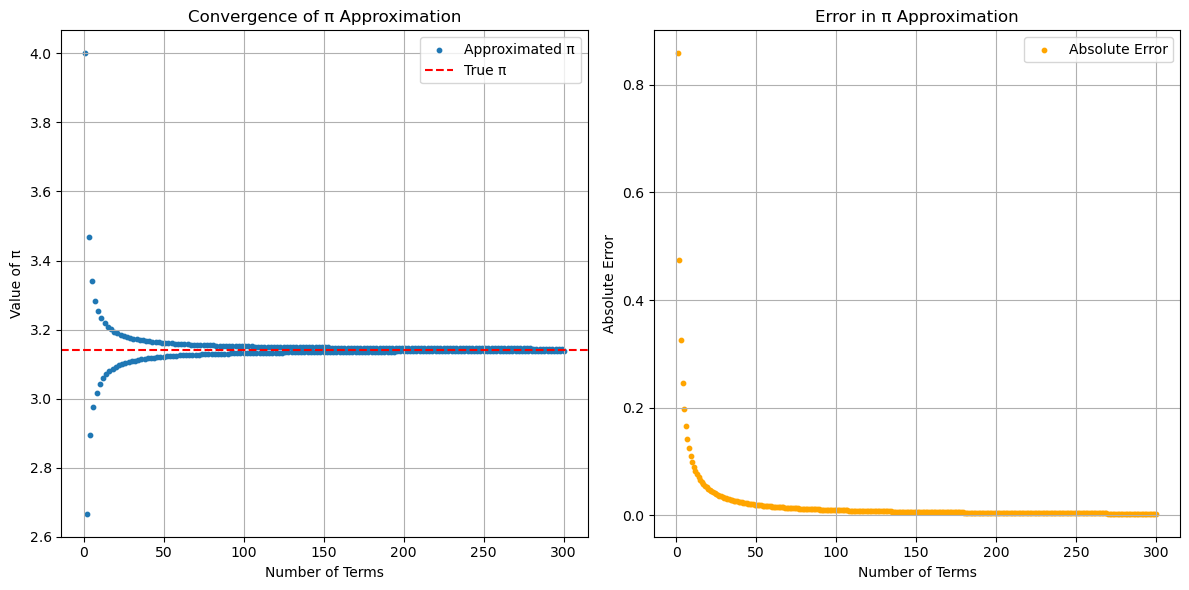

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_terms = 300  # Number of terms to compute

# Compute values of π and absolute errors
pi_values = []
true_pi = np.pi  # Reference value of π
errors = []

# Gregory-Leibniz series for π
for n in range(1, num_terms + 1):
    pi_approx = 4 * sum((-1) ** (k + 1) / (2 * k - 1) for k in range(1, n + 1))
    pi_values.append(pi_approx)
    errors.append(abs(pi_approx - true_pi))

# Create subplots
plt.figure(figsize=(12, 6))

# Scatter plot for π values vs. number of terms
plt.subplot(1, 2, 1)
plt.scatter(range(1, num_terms + 1), pi_values, s=10, label="Approximated π")
plt.axhline(y=true_pi, color='r', linestyle='--', label="True π")
plt.xlabel("Number of Terms")
plt.ylabel("Value of π")
plt.title("Convergence of π Approximation")
plt.legend()
plt.grid(True)

# Scatter plot for absolute error vs. number of terms
plt.subplot(1, 2, 2)
plt.scatter(range(1, num_terms + 1), errors, s=10, color="orange", label="Absolute Error")
plt.xlabel("Number of Terms")
plt.ylabel("Absolute Error")
plt.title("Error in π Approximation")
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


# Exercise 6
The planar curve called the epicycloid has the following Cartesian coordinates (x,y):
$$
x = (a + b)\cos(\theta) - b\cos\left(\frac{a}{b}+1\right)\theta, \quad y=(a+b)\sin(\theta)-b\sin\left(\frac{a}{b}+1\right)\theta
$$

Write a program to draw the curve (continuous an without symbols) for the interval $\theta$ = [0, 6$\pi$] and the values a=1/3 and b=1/8. Label the axes appropirately and include the values of a, b, and the interval of $\theta$ used in the title.

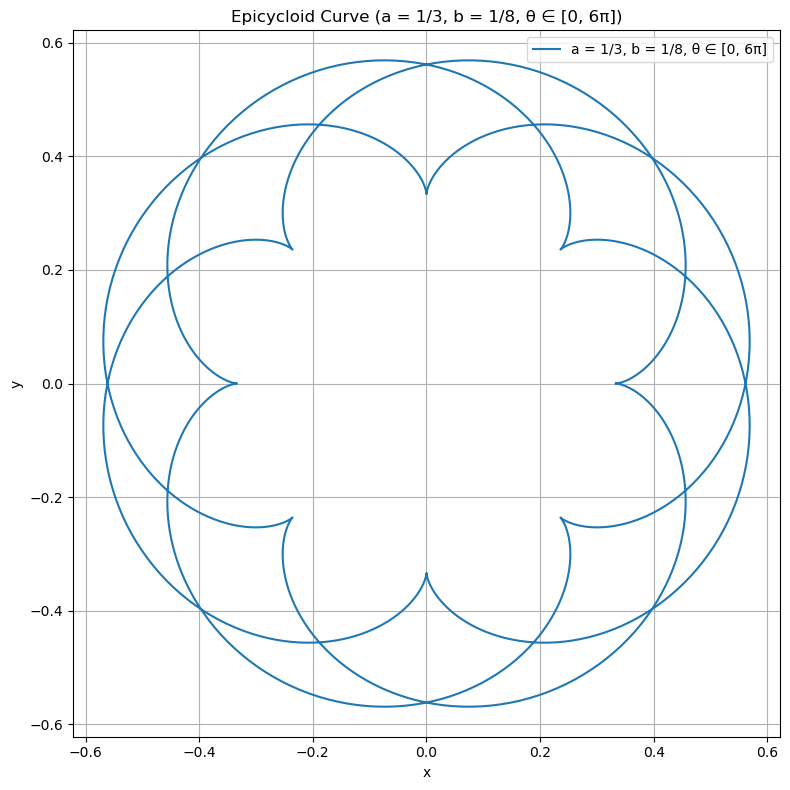

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a = 1/3
b = 1/8
theta = np.linspace(0, 6 * np.pi, 1000)  # Interval [0, 6π]

# Epicycloid equations
x = (a + b) * np.cos(theta) - b * np.cos(((a / b) + 1) * theta)
y = (a + b) * np.sin(theta) - b * np.sin(((a / b) + 1) * theta)

# Plot the curve
plt.figure(figsize=(8, 8))
plt.plot(x, y, label=f'a = 1/3, b = 1/8, θ ∈ [0, 6π]', linestyle='-', marker='')

# Label axes
plt.xlabel('x')
plt.ylabel('y')

# Title with parameters
plt.title(f'Epicycloid Curve (a = 1/3, b = 1/8, θ ∈ [0, 6π])')

# Equal aspect ratio for proper visualization
plt.axis('equal')
plt.grid(True)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


# Exercise 7
Use Kirshoff's laws to determine the currents flowing through this circuit, given that $V_1$=7.5V, $V_2$=5.4V, and the resistances are 6.7, 2.3, 9.0, 1.0 and 5.6 $\Omega$.

<div style="text-align: center;">
    <img src="exercise_7.png" alt="Diagram Exercise 7" width="500">
</div>

In [80]:
"""
First, we set up the system of equations, which, applying the mesh analysis method, would be as follows:

V1 = (R1 + R2 + R3)*I1 + R2*I2 + R3*I3
V2 = R2*I1 + (R2 + R5)*I2 - R5*I3
0 = R3I1 - R5*I2 + (R3 + R4 + R5)*I3
"""

import numpy as np

# Constants (you can replace these with the actual values)
V1 = 7.5  # Voltage source V1
V2 = 5.4  # Voltage source V2
R1 = 6.7  # Resistance R1
R2 = 2.3  # Resistance R2
R3 = 9.0  # Resistance R3
R4 = 1.0  # Resistance R4
R5 = 5.6  # Resistance R5

# Coefficient matrix
A = np.array([
    [R1 + R2 + R3, R2, R3],
    [R2, R2 + R5, -R5],
    [R3, -R5, R3 + R4 + R5]
])

# Constants vector
B = np.array([V1, V2, 0])

# Solve the system of linear equations
currents = np.linalg.solve(A, B)

# Extract the currents
I1, I2, I3 = currents

# Print the results
print(f"I1 (current in Mesh 1): {I1:.4f} A")
print(f"I2 (current in Mesh 2): {I2:.4f} A")
print(f"I3 (current in Mesh 3): {I3:.4f} A")


I1 (current in Mesh 1): 0.3190 A
I2 (current in Mesh 2): 0.6173 A
I3 (current in Mesh 3): 0.0375 A
